In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import uproot

import physt
import uproot_methods

In [2]:
data_sig = uproot.open("cards-ZH/shapes-chBSM2017.root")
data_3LC = uproot.open("cards-ZH/shapes-cat3L2017.root")
data_4LC = uproot.open("cards-ZH/shapes-cat4L2017.root")
data_EMC = uproot.open("cards-ZH/shapes-catEM2017.root")

data_WZ = uproot.open("/eos/cms/store/group/phys_exotica/monoZ/Exorcism2017/merged/WZTo3LNu_TuneCP5_13TeV-amcatnloFXFX-pythia8.root")
data_ZZ = uproot.open("/eos/cms/store/group/phys_exotica/monoZ/Exorcism2017/merged/ZZTo2L2Nu_13TeV_powheg_pythia8.root")

In [3]:
data_EMC["TOP"].physt().numpy_bins

array([ 100.,  200.,  400., 1000.])

# Checking systematics

In [4]:
def ratio(data, name='PDF_1718', proc='Signal'):
    nom = data['{}'.format(proc)]
    _nm = nom.values
    _up = data['{}_{}Up'.format(proc, name)  ].values
    _dw = data['{}_{}Down'.format(proc, name)].values
    
    x = np.array([np.mean(ib) for ib in nom.bins])
    r_dw = np.divide(_dw - _nm, _nm, out=np.zeros_like(_dw), where=_nm!=0)
    r_up = np.divide(_up - _nm, _nm, out=np.zeros_like(_up), where=_nm!=0)
    print("values : ", r_dw, r_up)
    return x, nom.edges, r_dw, r_up
    
def check_syst(data, name='PDF_1718', proc='Signal'):
    bsm_x, bsm_bins, bsm_dw, bsm_up = ratio(data, name=name, proc=proc)
    
    plt.figure(figsize=(7, 3))
    plt.hist( bsm_x, bins=bsm_bins, weights=bsm_up, color='r', histtype="step", lw=2)
    plt.hist( bsm_x, bins=bsm_bins, weights=bsm_dw, color='b', histtype="step", ls='--',lw=2)
    
    plt.xlabel("observable")
    plt.ylabel("ratio to nominal")
    plt.xlim([min(bsm_bins),max(bsm_bins)])
    plt.axhline(0, color='black', ls='--')
    print(bsm_dw.min(), bsm_up.min())
    plt.ylim(1.1*np.min([bsm_dw.min(), bsm_up.min()]),
             1.1*np.max([bsm_dw.max(), bsm_up.max()]))
    

# Chekcing 2018

In [5]:
data_17 = uproot.open("cards-ZH/shapes-chBSM2017.root")
data_18 = uproot.open("cards-ZH/shapes-chBSM2018.root")

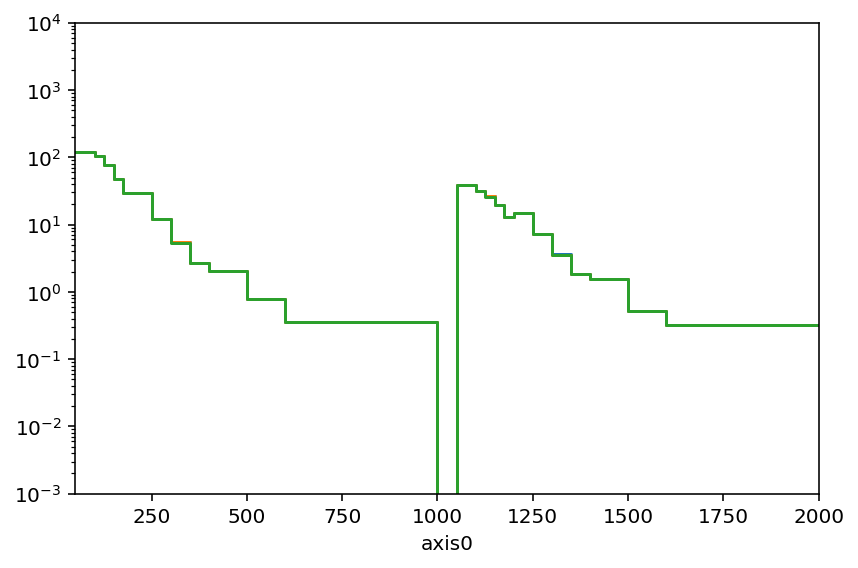

In [6]:
ax =  (
    #data_17["TOP"].physt() + 
    #data_17["WZ" ].physt() + 
    #data_17["WW" ].physt() + 
    #data_17["ZZ" ].physt() + 
    #data_17["VVV" ].physt() + 
    data_17["ZZ" ].physt() 
).plot('step')
data_17["ZZ_CMS_Vx_2017Up"   ].physt().plot('step', ax=ax)
data_17["ZZ_CMS_Vx_2017Down" ].physt().plot('step', ax=ax)
plt.ylim(0.001,10000)
plt.yscale("log")

values :  [0.01245818 0.00814279 0.01009311 0.00986675 0.01189509 0.00412743
 0.0089025  0.01147567 0.         0.         0.         0.
 0.         0.01199234 0.01159587 0.01249594 0.01460351 0.01884186
 0.01352607 0.         0.         0.         0.         0.
 0.        ] [-0.01395342 -0.01234424 -0.01154927 -0.0112753  -0.01340578 -0.00479377
 -0.01023885 -0.01300247  0.          0.          0.          0.
  0.         -0.01765468 -0.02072831 -0.01741645 -0.01653698 -0.02047785
 -0.01550253  0.          0.          0.          0.          0.
  0.        ]
0.0 -0.020728309381529676
values :  [0.00814824 0.01383    0.00955458 0.01030871 0.01019018 0.03083707
 0.00911301 0.         0.         0.         0.         0.
 0.         0.01168558 0.01506791 0.01455899 0.0170287  0.01588064
 0.01467589 0.         0.01748293 0.         0.         0.
 0.        ] [-0.0169847  -0.01527289 -0.01093179 -0.01140945 -0.01148379 -0.03209994
 -0.01046869  0.          0.          0.          0.         

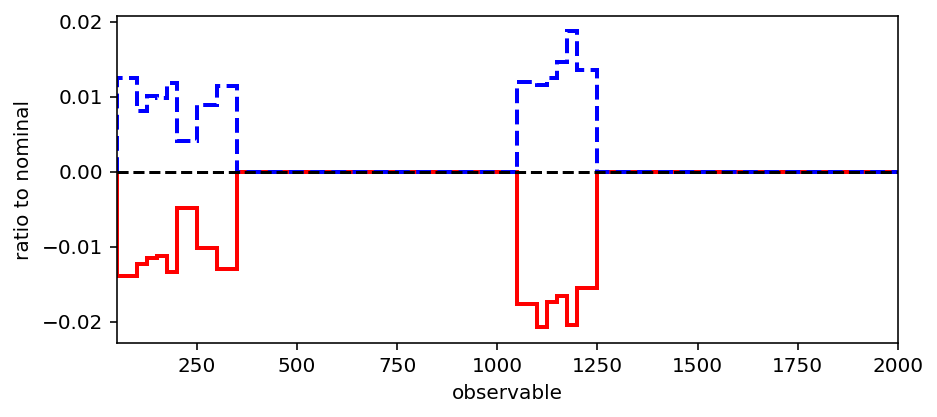

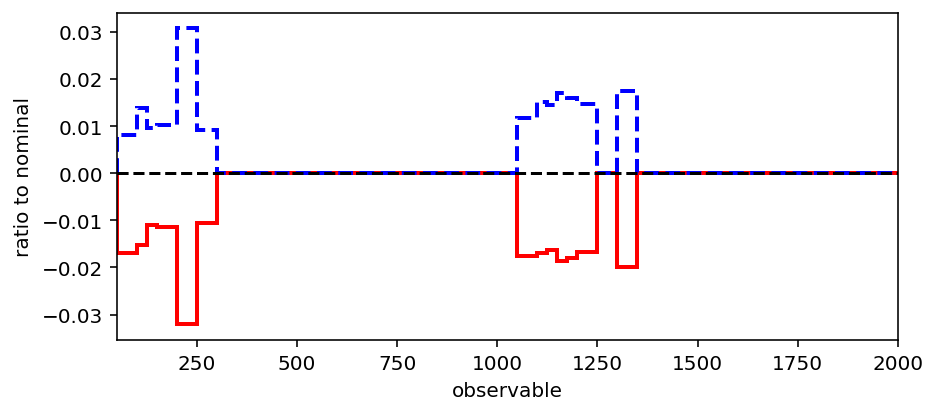

In [13]:
check_syst(data_17, name="CMS_BTag_2017", proc="DY")
check_syst(data_18, name="CMS_BTag_2018", proc="DY")

In [27]:
data_17.keys()

[b'data_obs;1',
 b'Signal;1',
 b'Signal_CMS_EFF_eUp;1',
 b'Signal_CMS_EFF_eDown;1',
 b'Signal_CMS_EFF_mUp;1',
 b'Signal_CMS_EFF_mDown;1',
 b'Signal_CMS_JES_2017Up;1',
 b'Signal_CMS_JES_2017Down;1',
 b'Signal_CMS_JER_2017Up;1',
 b'Signal_CMS_JER_2017Down;1',
 b'Signal_CMS_BTag_2017Up;1',
 b'Signal_CMS_BTag_2017Down;1',
 b'Signal_CMS_Trig_2017Up;1',
 b'Signal_CMS_Trig_2017Down;1',
 b'Signal_CMS_pfire_2017Up;1',
 b'Signal_CMS_pfire_2017Down;1',
 b'Signal_CMS_Vx_2017Up;1',
 b'Signal_CMS_Vx_2017Down;1',
 b'Signal_CMS_PU_2017Up;1',
 b'Signal_CMS_PU_2017Down;1',
 b'Signal_CMS_QCDScaleSignal_2017Up;1',
 b'Signal_CMS_QCDScaleSignal_2017Down;1',
 b'Signal_PDF_1718Up;1',
 b'Signal_PDF_1718Down;1',
 b'ZZ;1',
 b'ZZ_CMS_EFF_eUp;1',
 b'ZZ_CMS_EFF_eDown;1',
 b'ZZ_CMS_EFF_mUp;1',
 b'ZZ_CMS_EFF_mDown;1',
 b'ZZ_CMS_JES_2017Up;1',
 b'ZZ_CMS_JES_2017Down;1',
 b'ZZ_CMS_JER_2017Up;1',
 b'ZZ_CMS_JER_2017Down;1',
 b'ZZ_CMS_BTag_2017Up;1',
 b'ZZ_CMS_BTag_2017Down;1',
 b'ZZ_CMS_Trig_2017Up;1',
 b'ZZ_CMS_Trig_201